# TP1 - Détéctions de points d'intêrets

In [1]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.ndimage as ndi
import scipy.signal as sig
from skimage.io import imread,imshow
from skimage.color import rgb2gray
import cv2



'''
from scipy import signal as sig,ndimage
import numpy as np
from skimage.io import imread,imshow
from skimage.color import rgb2gray 
'''

'\nfrom scipy import signal as sig,ndimage\nimport numpy as np\nfrom skimage.io import imread,imshow\nfrom skimage.color import rgb2gray \n'

## Exercice 1 - Détection de points d'intérêts

### 1 - Détecteur de Harris


### Avec une fenêtre de pondération rectangulaire

In [28]:
def detection_harris_rectangle(img_path,rot):

    img = imread(img_path)

    if rot != 0 :
        img= ndi.rotate(img,rot, reshape=False)
        
    img_gray=rgb2gray(img) # ---> rgb2gray normalise la matrice


    width = np.shape(img_gray)[1] # largeur et hauteurs de l'image
    height = np.shape(img_gray)[0]

    Sobel_x = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]]) # filtre de sobel pour la dérivée en x 
    Sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) # filtre de sobel pour la dérivée en y

    Ix = sig.convolve2d(img_gray, Sobel_x, mode='same') # convolution par le filtre de Sobel
    Iy = sig.convolve2d(img_gray, Sobel_y, mode='same')


    #Ix = Ix.flatten
    #Iy = Iy.flatten
    #x,y = neshjrid
    #kpts = x[C>seuil],y[C>seuil]


    Ix2= np.square(Ix) # les trois calculs pour la matrice M
    Iy2=np.square(Iy)
    IxIy= (Ix*Iy)

    img_copy_for_corners = np.copy(img) # on crée une copie pour ne pas altérer l'imgae d'originie
    k=0.02 # paramètre à ajuster
    count = 0
    for x in range(height): 
        for y in range(width):
            Mx = np.sum(Ix2[x-1:x+1, y-1:y+1]) # on calcule les sommes sur notre fenêtre 
            My = np.sum(Iy2[x-1:x+1, y-1:y+1])
            Mxy = np.sum(IxIy[x-1:x+1, y-1:y+1])
            deter = (Mx * My) - (Mxy**2) 
            trace = Mx + My
            C = deter - k*(trace**2) # calcul du critère pour le seuillage des points d'intérêts
            if C >0 :
                img_copy_for_corners[x, y] = [255,0,0] # on met en rouge les points d'intérêts
                count+=1
    return img_copy_for_corners,count

                

In [32]:

img = imread("M1.JPG")
img_gray=rgb2gray(img)
print(img_gray)

'''
coins_brute,count_rect = detection_harris_rectangle(img,0)
imshow(coins_brute)
'''


[[0.76316627 0.55059804 0.57783373 ... 0.59185333 0.59185333 0.59185333]
 [0.55828549 0.23843608 0.21666353 ... 0.27439294 0.27831451 0.27831451]
 [0.56836863 0.22638863 0.21916353 ... 0.28195333 0.28195333 0.27803176]
 ...
 [0.50894863 0.12071333 0.11146353 ... 0.30165529 0.28486784 0.27310314]
 [0.5128702  0.12855647 0.11481961 ... 0.29381216 0.29271098 0.29271098]
 [0.5128702  0.1246349  0.11481961 ... 0.2506749  0.26636118 0.26636118]]


'\ncoins_brute,count_rect = detection_harris_rectangle(img,0)\nimshow(coins_brute)\n'

### Fonction pour la suppression des non-maxima locaux

In [6]:
def sup_non_maxima(img: np.ndarray,img_originale_path) -> np.ndarray:
    
    img_originale = imread(img_originale_path)
    img_gray=rgb2gray(img)
    image_avec_pt=np.copy(img)

    width = np.shape(img_gray)[1] # largeur et hauteurs de l'image
    height = np.shape(img_gray)[0]
    count_suppr = 0

    for x in range(height-1): 
        for y in range(width-1):
            intvect = [img_gray[x][y],img_gray[x-1][y],img_gray[x+1][y],img_gray[x-1][y-1],img_gray[x+1][y-1],img_gray[x][y-1],img_gray[x][y+1],img_gray[x-1][y+1],img_gray[x+1][y+1]]
            if 0.8*np.max(intvect) > img_gray[x][y] :        # si le pixel que l'on examine n'est pas un max local, 
                image_avec_pt[x][y] = img_originale[x][y]         # On lui rend sa couleur initiale (il ne sera plus en rouge)
    
    for x in range(height): 
        for y in range(width):
            if (image_avec_pt[x][y])[0] == 255 : 
                count_suppr +=1
    return image_avec_pt,count_suppr

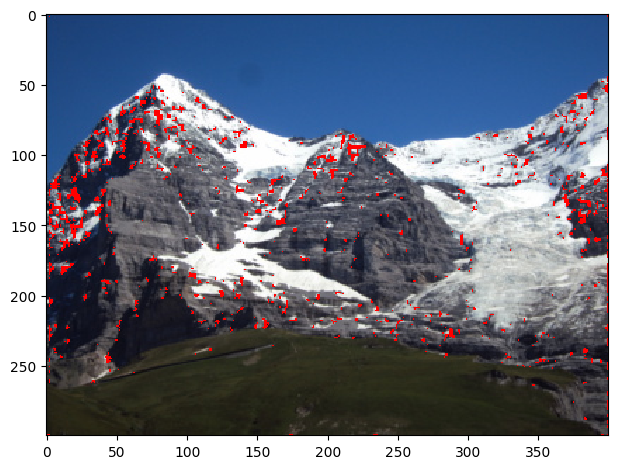

In [7]:
img_suppr,c_supr_rect= sup_non_maxima(coins_brute,img)
imshow(img_suppr)

### Avec une fenêtre de pondération gaussienne

In [8]:
def detection_harris_gauss(img_path,rot):

    img = imread(img_path)
    if rot != 0 :
        img= ndi.rotate(img,rot, reshape=False)
    img_gray=rgb2gray(img)


    width = np.shape(img_gray)[1] # largeur et hauteurs de l'image
    height = np.shape(img_gray)[0]
    Sobel_x = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]]) # filtre de sobel pour la dérivée en x 
    Sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) # filtre de sobel pour la dérivée en y


    Ix = sig.convolve2d(img_gray, Sobel_x, mode='same') # convolution par le filtre de Sobel
    Iy = sig.convolve2d(img_gray, Sobel_y, mode='same')


    Ix2= np.square(Ix) # les trois calculs pour la matrice M
    Iy2=np.square(Iy)
    IxIy= (Ix*Iy)
    
    
    sigma = 1
    kernel_size = 3  # Adjust the kernel size as needed
    gaussian_kernel = np.zeros((kernel_size, kernel_size))
    for y in range(kernel_size):
        for x in range(kernel_size):
            gaussian_kernel[y, x] = 1 / (2 * np.pi * sigma ** 2) * np.exp(-((x - (kernel_size - 1) / 2) ** 2 + (y - (kernel_size - 1) / 2) ** 2) / (2 * sigma ** 2))

    # Convolve the matrices with the Gaussian kernel
    Ix2gauss = sig.convolve2d(Ix2, gaussian_kernel, boundary='fill', mode='same')
    Iy2gauss = sig.convolve2d(Iy2, gaussian_kernel, boundary='fill', mode='same')
    IxIygauss = sig.convolve2d(IxIy, gaussian_kernel, boundary='fill', mode='same')

    img_copy_for_corners = np.copy(img) # on créer une copie pour ne pas altérer l'imgae d'originie
    k=0.04 # paramètre à ajuster
    count= 0
    
    for x in range(height):
        for y in range(width):
            deter = (Ix2gauss[x][y] * Iy2gauss[x][y]) - (IxIygauss[x][y]**2) 
            trace = Ix2gauss[x,y] + Iy2gauss[x,y]
            C = deter - k*(trace**2) # calcul du critère pour le seuillage des points d'intérêts
            if C >0.1 :
                img_copy_for_corners[x, y] = [255,0,0] # on met en rouge les points d'intérêts
                count += 1
    return img_copy_for_corners,count

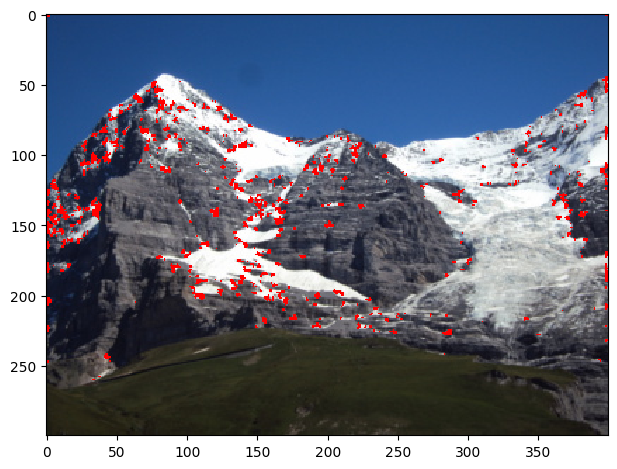

In [9]:
coins_brute_gauss,count_gauss= detection_harris_gauss(img,0)
imshow(coins_brute_gauss)

### Avec suppression :

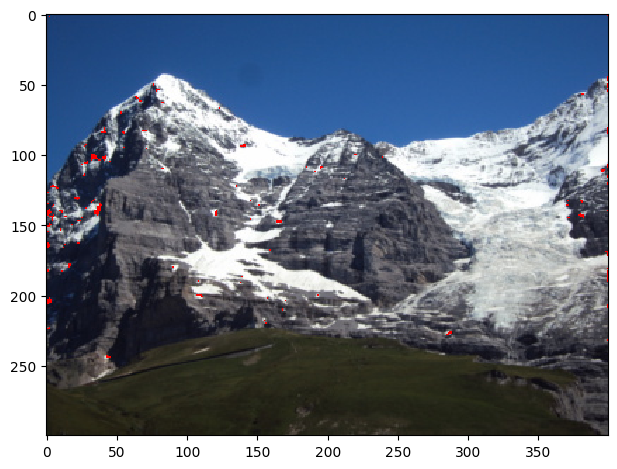

In [10]:
img_suppr_gauss,c_supr_gauss = sup_non_maxima(coins_brute_gauss,img)
imshow(img_suppr_gauss)

### Influence du type de fenêtre de pondération, de sa taille ainsi que du paramètre k dans la détection de point d’intérêt.

#### 1) Influence du type de fênetre 

In [32]:
print("le nombre de coins détéctés par la fenêtre rectangulaire est : " + str(count_rect) +"\n" + "le nombre de coins détécté par la fenêtre gaussienne est : " + str(count_gauss))
print("le nombres de points supprimés pour la fenêtre rectangulaire est : " + str(c_supr_rect) + "\n" + "le nombres de points supprimés pour la fenêtre gaussienne est : " + str(c_supr_gauss))

le nombre de coins détéctés par la fenêtre rectangulaire est : 16180
le nombre de coins détécté par la fenêtre gaussienne est : 3045
le nombres de points supprimés pour la fenêtre rectangulaire est : 3288
le nombres de points supprimés pour la fenêtre gaussienne est : 661


In [283]:
#### 2) Influence de la taille de la fenêtre

### Rotation de l'image

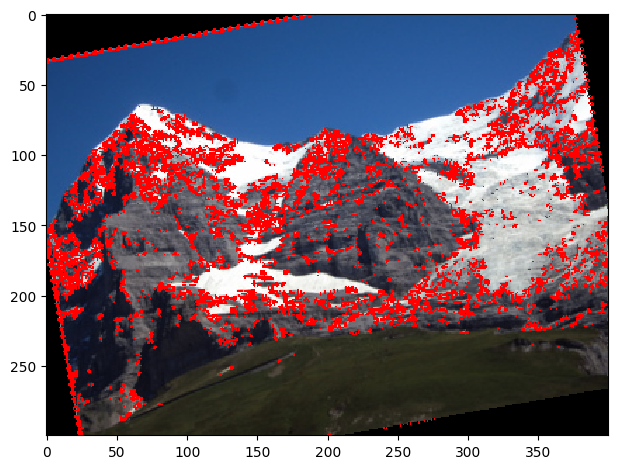

In [11]:
coins_brute_rota,count_rect_rota = detection_harris_rectangle(img,10)
imshow(coins_brute_rota)


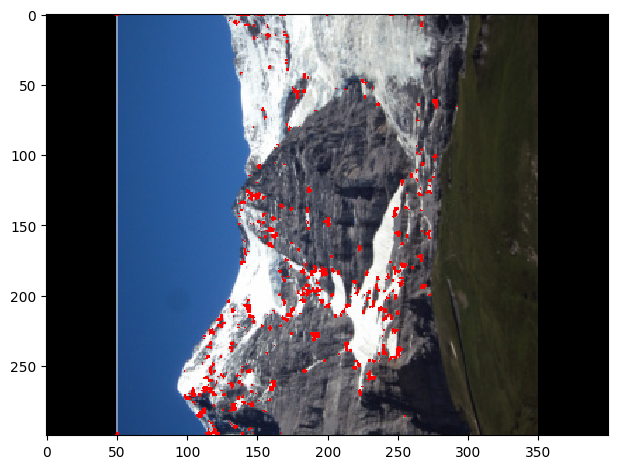

In [14]:
coins_brute_gauss_rota,count_gauss_rota = detection_harris_gauss(img,90)
imshow(coins_brute_gauss_rota)


In [15]:
print("le nombre de coins détéctés par la fenêtre rectangulaire est : " + str(count_rect_rota) +"\n" + "le nombre de coins détécté par la fenêtre gaussienne est : " + str(count_gauss_rota))
print("le nombres de points supprimés pour la fenêtre rectangulaire est : " + str(c_supr_rect) + "\n" + "le nombres de points supprimés pour la fenêtre gaussienne est : " + str(c_supr_gauss))

le nombre de coins détéctés par la fenêtre rectangulaire est : 16398
le nombre de coins détécté par la fenêtre gaussienne est : 2073
le nombres de points supprimés pour la fenêtre rectangulaire est : 3288
le nombres de points supprimés pour la fenêtre gaussienne est : 661


### 2 - Détecteur FAST

On commence par implémenter une fonction qui récupère la valeur de l'intensité des 16 pixels du cercle autour du pixel $p_0$ que l'on cherche à tester.

In [22]:
''' Cette fonction permet de calculer les points d'un cercle de rayon 3
autour d'un point de coordonnées (ligne,col) et de renvoyer les coordonnées
de ces points dans une liste'''

def cercle(ligne: int, col: int) -> np.ndarray :
    

    pt = [(ligne-3, col),(ligne-3, col+1),(ligne-2, col+2),(ligne-1, col+3),(ligne, col+3),(ligne+1, col+3),
          (ligne+2, col+2),(ligne+3, col+1),(ligne+3, col),(ligne+3, col-1),(ligne+2, col-2),(ligne+1, col-3),
          (ligne, col-3),(ligne-1, col-3),(ligne-2, col-2),(ligne-3, col-1)]
    return pt

print(cercle(33,33))


[(30, 33), (30, 34), (31, 35), (32, 36), (33, 36), (34, 36), (35, 35), (36, 34), (36, 33), (36, 32), (35, 31), (34, 30), (33, 30), (32, 30), (31, 31), (30, 32)]


Puis, on implémente la fonction capable de comparer l'intensité des différents points du cercle autour de p0. Si n pixels du cercle ont une intensité suffisamment différente de celle de p0, la fonction renvoie True.

In [21]:
''' Cette fonction permet de comparer l'intensité du point p0 avec les points du cercle'''

def compare_Intensity(image: np.ndarray, pt_cercle: list, I_p0: float, t: float, n: int):
    sup_nb = 0
    for i in range(len(pt_cercle)):
        if (image[pt_cercle[i][0]][pt_cercle[i][1]] > t + I_p0) | (image[pt_cercle[i][0]][pt_cercle[i][1]] < I_p0 - t):
            sup_nb += 1     # on compte le nombre de points du cercle dont l'intensité est supérieure à celle du point p0
    if sup_nb >= n:       # si ce nombre est supérieur au paramètre n (à initialiser), on renvoie True, il s'agit d'un point d'intérêt
        return True
    else:
        return False     # sinon, on renvoie False, ce n'est pas un point d'intérêt
    

Enfin, on implémente la fonction $fast()$ qui utilise les deux fonctions précédentes pour chaque pixel de l'image (sauf ceux qui ce trouve aux extrémités de l'image et pour lesquels on ne peut pas tracer un cercle complet). Si $compare\_ Intensity()$ renvoie True, la fonction $fast()$ marque le point d'intérêt en rouge.

In [19]:

def fast(image_path: np.ndarray, t: float, n: int, rot: int) -> np.ndarray:
    
    image = imread(image_path)

    if rot != 0 :
        image= ndi.rotate(image,rot, reshape=False)
    img_gray=rgb2gray(image)

    #x,y = neshjrid
    #xN = x +[0,1,2,3,3,3,2,1,0,-1,-2,-3,-3,-3,-2,1]
    #yN = y +[3,3,2,1,0,-1,-2,-3,-3,-3,-2,-1,0,1,2,3]
    #imgN = img.flatten()[xN*img.shape(1)+yN]
    


    width = np.shape(image)[1] # largeur et hauteurs de l'image
    height = np.shape(image)[0]
    x, y = 0, 0

    img_gray=rgb2gray(image)
    
    img_copy_for_FAST = np.copy(image)

    for x in range(3,height-3): 
        for y in range(3,width-3):
            
            pt_cercle = cercle(x,y)
            I_p0 = img_gray[x][y]

            if compare_Intensity(img_gray, pt_cercle, I_p0, t, n):
                img_copy_for_FAST[x][y] = [255,0,0]
            
            if((y+3)%width == 0):
                break
            
    
    return img_copy_for_FAST

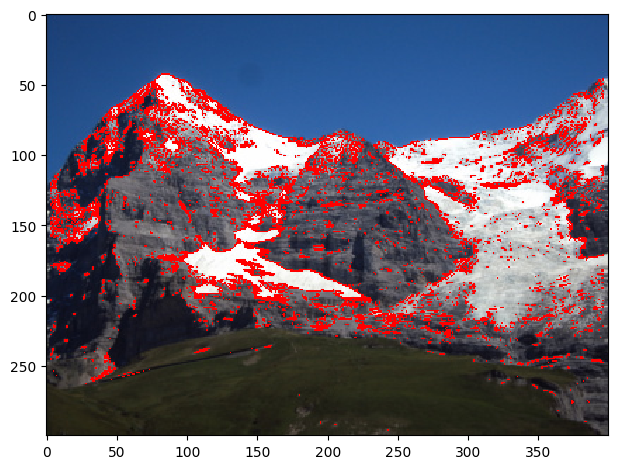

In [23]:
''' TEST de la méthode FAST '''

img_FAST = fast("M1.JPG", 0.09, 12, 0)

imshow(img_FAST)

### Suppression des non-maxima locaux pour FAST

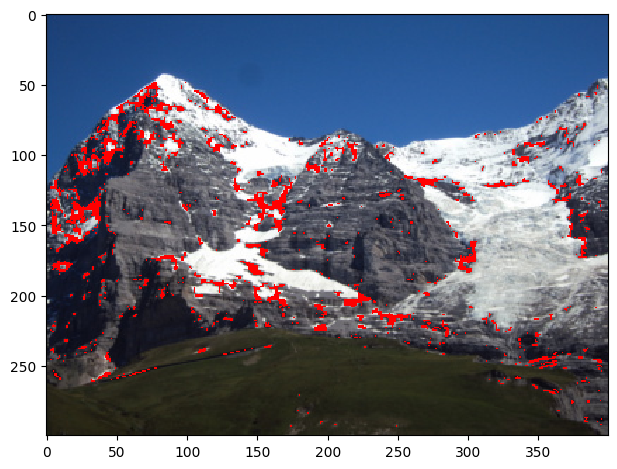

In [25]:

img_FAST = fast(img, 0.09, 10, 0)
new_FAST_image,c = sup_non_maxima(img_FAST, img)

imshow(new_FAST_image)

### Affichage de la différence avec/sans maxima locaux

img_diff = img_FAST - new_FAST_image

#imshow(img_diff)

In [327]:
# Algo pour avoir les points d'intérêt en blanc sur fond de l'image en noire


def fast_comp(image: np.ndarray, t: float, n: int) -> np.ndarray:

    width = np.shape(image)[1] # largeur et hauteurs de l'image
    height = np.shape(image)[0]
    x, y = 0, 0

    img_gray=rgb2gray(image)
    
    img_copy_for_FAST = np.copy(img_gray)

    for x in range(3,height-3): 
        for y in range(3,width-3):
            
            pt_cercle = cercle(x,y)
            I_p0 = img_gray[x][y]

            if compare_Intensity(img_gray, pt_cercle, I_p0, t, n):
                img_copy_for_FAST[x][y] = [255,255,255]
            else :
                img_copy_for_FAST[x][y] = [0,0,0]
            
            if((y+3)%width == 0):
                img_copy_for_FAST[x][y] = [0,0,0]
                img_copy_for_FAST[x][y+1] = [0,0,0]
                img_copy_for_FAST[x][y+2] = [0,0,0]
                img_copy_for_FAST[x][y+3] = [0,0,0]
                break
            
    
    return img_copy_for_FAST

img = imread('M1.JPG')

img_FAST_black = fast_comp(img, 0.09, 10)

imshow(img_FAST_black)


ValueError: setting an array element with a sequence.

# Exercices : Description et matching des points d'intérêt

In [33]:
# Nouvelle fonction FAST qui renvoie un vecteur de points d'intérêt

def fast_for_matching(image_path: np.ndarray, t: float, n: int, rot: int) -> np.ndarray:
    
    image = imread(image_path)

    if rot != 0 :
        image= ndi.rotate(image,rot, reshape=False)
    img_gray=rgb2gray(image)

    #x,y = neshjrid
    #xN = x +[0,1,2,3,3,3,2,1,0,-1,-2,-3,-3,-3,-2,1]
    #yN = y +[3,3,2,1,0,-1,-2,-3,-3,-3,-2,-1,0,1,2,3]
    #imgN = img.flatten()[xN*img.shape(1)+yN]


    width = np.shape(image)[1] # largeur et hauteurs de l'image
    height = np.shape(image)[0]
    x, y = 0, 0
    vect_pt_interet = []

    img_gray=rgb2gray(image)
    
    img_copy_for_FAST = np.copy(image)

    for x in range(3,height-3): 
        for y in range(3,width-3):
            
            pt_cercle = cercle(x,y)
            I_p0 = img_gray[x][y]

            if compare_Intensity(img_gray, pt_cercle, I_p0, t, n):
                vect_pt_interet.append((x,y))    # on rentre les coordonnées des pt d'intérêt
                                                 # dans un vecteur au lieu de colorer l'image en rouge
            if((y+3)%width == 0):
                break
    
    return(vect_pt_interet)
            


In [35]:
def bloc_descriptor(img_path1, img_path2, taille_bloc ,type_methode : int):


    # récupérer les points d'intérêt (img 1 et 2)

    vect_interet_1 = fast_for_matching(img_path1, 0.09, 12, 0) 
    vect_interet_2 = fast_for_matching(img_path2, 0.09, 12, 0) 
    taille_vect1 = np.shape(vect_interet_1)[0]
    taille_vect2 = np.shape(vect_interet_2)[0]

    # créer n1+n2 vecteurs de bloc (avec n1, n2 = le nombre de points d'intérêt dans img 1 et 2 resp)
    # On stock ces vecteurs sous forme de matrice. Les deux matrices sont vecteurs_de_bloc_1 et 2. Une matrice par image.

    vecteurs_de_bloc_1 = []
    vecteurs_de_bloc_2 = []

    for i in range(taille_vect1):
        (x,y)=vect_interet_1[i]
        intvect1 = [img_gray[x][y],img_gray[x-1][y],img_gray[x+1][y],img_gray[x-1][y-1],img_gray[x+1][y-1],img_gray[x][y-1],img_gray[x][y+1],img_gray[x-1][y+1],img_gray[x+1][y+1]]
        # pour l'instant on observe juste les plus proches voisins
        vecteurs_de_bloc_1.append(intvect1)
    for i in range(taille_vect2):
        (x,y)=vect_interet_2[i]
        intvect2 = [img_gray[x][y],img_gray[x-1][y],img_gray[x+1][y],img_gray[x-1][y-1],img_gray[x+1][y-1],img_gray[x][y-1],img_gray[x][y+1],img_gray[x-1][y+1],img_gray[x+1][y+1]]
        # pour l'instant on observe juste les plus proches voisins
        vecteurs_de_bloc_2.append(intvect2)


    # Suppression des mauvais match : appariement croisé pour chaque pt d'intérêt

    dist1 = []
    dist2 = []
    min_dist1 = []
    min_dist2 = []
    size_vecteurs_bloc_1 = np.shape(vecteurs_de_bloc_1)
    size_vecteurs_bloc_2 = np.shape(vecteurs_de_bloc_2)
    print(size_vecteurs_bloc_1)

    for i in range(size_vecteurs_bloc_1[0]):
        for j in range(size_vecteurs_bloc_2[0]):
            somme = 0
            for k in range(size_vecteurs_bloc_1[1]):
                somme+=np.abs(vecteurs_de_bloc_1[i][k] - vecteurs_de_bloc_2[j][k])
            dist1.append(somme)
        min_dist1.append(np.argmin(dist1)) # On récupère l'indice de la valeur minimum de distance qui pointe vers 
                                           # le point d'intérêt de l'image 2 qui match le point d'intérêt de l'image 1

    for i in range(size_vecteurs_bloc_2[0]):
        for j in range(size_vecteurs_bloc_1[0]):
            somme = 0
            for k in range(size_vecteurs_bloc_2[1]):
                somme+=np.abs(vecteurs_de_bloc_2[i][k] - vecteurs_de_bloc_1[j][k])
            dist2.append(somme)
        min_dist2.append(np.argmin(dist2)) # On récupère l'indice de la valeur minimum de distance qui pointe vers 
                                           # le point d'intérêt de l'image 1 qui match le point d'intérêt de l'image 2
    

    for i in range(len(min_dist1)):
        if(min_dist1[i] != min_dist2[i]):

            del(vect_interet_1[min_dist1[i]])  # On supprime les points d'interet qui ont des mauvais appariements
            del(vect_interet_2[min_dist2[i]])  # des liste vect_interet_1 et 2
            del(vecteurs_de_bloc_1[min_dist1[i]])
            del(vecteurs_de_bloc_2[min_dist2[i]])
            del(min_dist1[i])
            del(min_dist2[i])


    # Appariement des points d'intérêt : 

    appariement = []

    for m in range(len(min_dist1)):
        appariement.append((vect_interet_1[m], vect_interet_2[min_dist1[m]]))

    return appariement
    

    

In [36]:

print(bloc_descriptor("M1.JPG", "M2.JPG", 0, 0))

(11546, 9)


KeyboardInterrupt: 